In [20]:
import pandas as pd

In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [22]:
heart = pd.read_csv('pipe.csv')
###heart = heart.drop(['0'] , axis=1).to_numpy()
heart.head()

,material,tomr,cf,c_wave_no,cd_radial,cw_circumferencial,crack
0,3,0.4217,2,1,0.6131,0.9991,1
1,6,0.7629,4,-2,0.3846,0.9982,1
2,5,0.1898,1,-7,0.6917,0.9982,1
3,2,0.4062,2,-2,0.5927,0.9980,1
4,6,0.8078,4,-10,0.9345,0.9980,1


In [23]:
heart = heart.sample(frac = 1)

In [24]:
heart.describe()

,material,tomr,cf,c_wave_no,cd_radial,cw_circumferencial,crack
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,3.498712,0.513430,2.510562,-0.214323,0.507636,0.505248,0.714580
std,1.738771,0.281712,1.115734,6.639108,0.275653,0.284353,0.451731
min,1.000000,0.025100,1.000000,-11.000000,0.027700,0.025200,0.000000
25%,2.000000,0.276400,2.000000,-6.000000,0.271200,0.261800,0.000000
50%,4.000000,0.515600,3.000000,0.000000,0.500100,0.495100,1.000000
75%,5.000000,0.761200,4.000000,6.000000,0.745400,0.753700,1.000000
max,6.000000,0.999700,4.000000,11.000000,0.999500,0.999100,1.000000


In [25]:
heart.shape

(1941, 7)

In [26]:
Y = heart.crack.to_numpy()
Y

array([1, 1, 0, ..., 0, 1, 1])

In [27]:
X = heart.drop(['crack'] , axis=1).to_numpy()
X

array([[ 3.    ,  0.7611,  4.    ,  2.    ,  0.4473,  0.1485],
       [ 2.    ,  0.1545,  1.    , -1.    ,  0.3195,  0.8663],
       [ 1.    ,  0.2242,  1.    , -9.    ,  0.0705,  0.3531],
       ...,
       [ 1.    ,  0.2947,  2.    , -4.    ,  0.1238,  0.1787],
       [ 1.    ,  0.44  ,  2.    ,  4.    ,  0.1458,  0.9556],
       [ 1.    ,  0.8629,  4.    ,  9.    ,  0.7341,  0.9359]])

In [28]:
# splitting the data
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.25 , random_state = 42)
'''
Fitting the model 

    base_estimator: It is a weak learner used to train the model.|
    n_estimators: Number of weak learners to train in each iteration.
    learning_rate: It contributes to the weights of weak learners. It uses 1 as a default value.

'''
#n_estimators = [ 2, 3, 4, 5, 6, 7, 10, 15, 20, 30 , 40, 45 , 50 , 60]
n_estimators = [50]
accuracy_result = []
finalModel  = 0
precision_result =[]
f1_result = []
recall_result = []

max_acc = 0
index =0
count=0
best_model = 0


for i in n_estimators :
    for j in range(0,100) : 
        
        alpha = (0.97 + j / 1000)
        abc = AdaBoostClassifier(n_estimators=i,
                            learning_rate=alpha)
                    

        # We then go ahead and fit our object abc to our training dataset. We call it a model.

        model = abc.fit(X_train, Y_train)

        # Making predictions
        y_pred = model.predict(X_test)

        # Evaluating the model 
        print("Accuracy:", metrics.accuracy_score(Y_test, y_pred))
        accuracy_result.append(round(metrics.accuracy_score(Y_test , y_pred) , 6))

        print("Precision score : " , metrics.precision_score(Y_test , y_pred))
        precision_result.append(round(metrics.precision_score(Y_test , y_pred) , 6))

        print("Recall score : " , metrics.recall_score(Y_test , y_pred))
        recall_result.append(round(metrics.recall_score(Y_test , y_pred) , 6))

        print("F1 score :  " , metrics.f1_score(Y_test , y_pred))
        f1_result.append(round(metrics.f1_score(Y_test , y_pred) , 6))

        count = count + 1

        if(round(metrics.accuracy_score(Y_test , y_pred) , 6) > max_acc ) : 
            max_acc = round(metrics.accuracy_score(Y_test , y_pred) , 6)
            index = count
            best_model = model

print("Max accuracy : " , accuracy_result[index])
print("Max precision : " , precision_result[index])
print("Recall result : " , recall_result[index])
print("F1 score : " , f1_result[index])
    


    

Accuracy: 0.7592592592592593
Precision score :  0.8328530259365994
Recall score :  0.8304597701149425
F1 score :   0.8316546762589928
Accuracy: 0.7592592592592593
Precision score :  0.8328530259365994
Recall score :  0.8304597701149425
F1 score :   0.8316546762589928
Accuracy: 0.7592592592592593
Precision score :  0.8328530259365994
Recall score :  0.8304597701149425
F1 score :   0.8316546762589928
Accuracy: 0.7592592592592593
Precision score :  0.8328530259365994
Recall score :  0.8304597701149425
F1 score :   0.8316546762589928
Accuracy: 0.7592592592592593
Precision score :  0.8328530259365994
Recall score :  0.8304597701149425
F1 score :   0.8316546762589928
Accuracy: 0.7551440329218106
Precision score :  0.8377581120943953
Recall score :  0.8160919540229885
F1 score :   0.8267831149927221
Accuracy: 0.7551440329218106
Precision score :  0.8377581120943953
Recall score :  0.8160919540229885
F1 score :   0.8267831149927221
Accuracy: 0.7551440329218106
Precision score :  0.837758112094

In [38]:
from sklearn.model_selection import RepeatedStratifiedKFold , GridSearchCV

# defining the classifier
model = AdaBoostClassifier()

# creating a dic for the grid
grid = dict()

# estimator till 500
grid['n_estimators'] = [ 2, 3, 4, 5, 10, 15, 25, 50 , 75, 100 , 200 , 500]

# defining learning rate
alpha = []
for i in range(0,100) :
    alpha.append((0.97 + i/100))


grid['learning_rate'] = alpha


# defining the CV
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)

# initializing the grid search
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')


# training the model on grid search for hyperparameter tuning of Adaboost
grid_result = grid_search.fit(X_train, Y_train)

# finding the best results /hyperparameter tuning of Adaboost
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

: 

In [ ]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold" , "7th Fold" , "8th Fold" , "9th Fold" , "10th Fold" , "11th Fold" , "12th Fold" ,"13th Fold" , "14th Fold" , "15th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()

        plt.grid(True)
        plt.show()

: 

In [ ]:
from sklearn.model_selection import cross_validate

def cross_validation(model , _X , _Y , _cv) :
    '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,
                               X=_X,
                               y=_Y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
    return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              } 



: 

In [ ]:
adaboost_result = cross_validation(best_model , X , Y , 14)
print(adaboost_result)

{'Training Accuracy scores': array([0.81798002, 0.81243063, 0.80854606, 0.81132075, 0.81187569,
       0.81742508, 0.80743618, 0.81298557, 0.81243063, 0.80809762,
       0.81641708, 0.8114254 , 0.81808098, 0.80809762]), 'Mean Training Accuracy': 81.2467808835775, 'Training Precision scores': array([0.90328007, 0.89715719, 0.89456067, 0.89173554, 0.8811245 ,
       0.89660877, 0.8872428 , 0.89007383, 0.89386401, 0.89119601,
       0.89775561, 0.90306122, 0.89933444, 0.88543372]), 'Mean Training Precision': 0.893744884237962, 'Training Recall scores': array([0.83449883, 0.83307453, 0.82996894, 0.83773292, 0.85170807,
       0.84161491, 0.83695652, 0.8423913 , 0.83695652, 0.83307453,
       0.83850932, 0.82453416, 0.83928571, 0.84006211]), 'Mean Training Recall': 0.8371691714083019, 'Training F1 scores': array([0.86752827, 0.86392915, 0.86105518, 0.86389111, 0.8661666 ,
       0.86824189, 0.86136636, 0.86557639, 0.86447474, 0.8611557 ,
       0.86712164, 0.86201299, 0.86827309, 0.86215139

: 

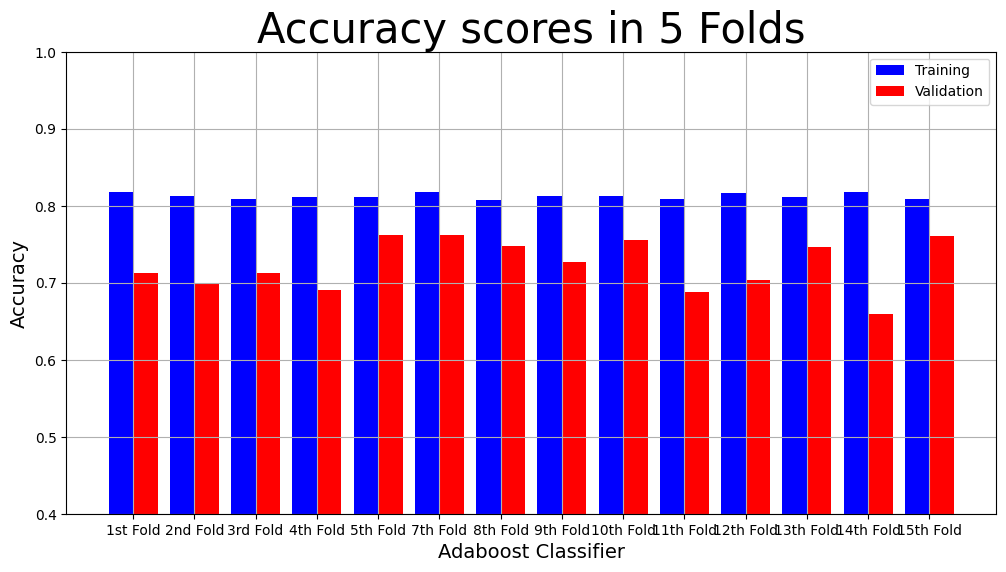

: 

In [ ]:
model_name = "Adaboost Classifier"

plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            adaboost_result["Training Accuracy scores"],
            adaboost_result["Validation Accuracy scores"])


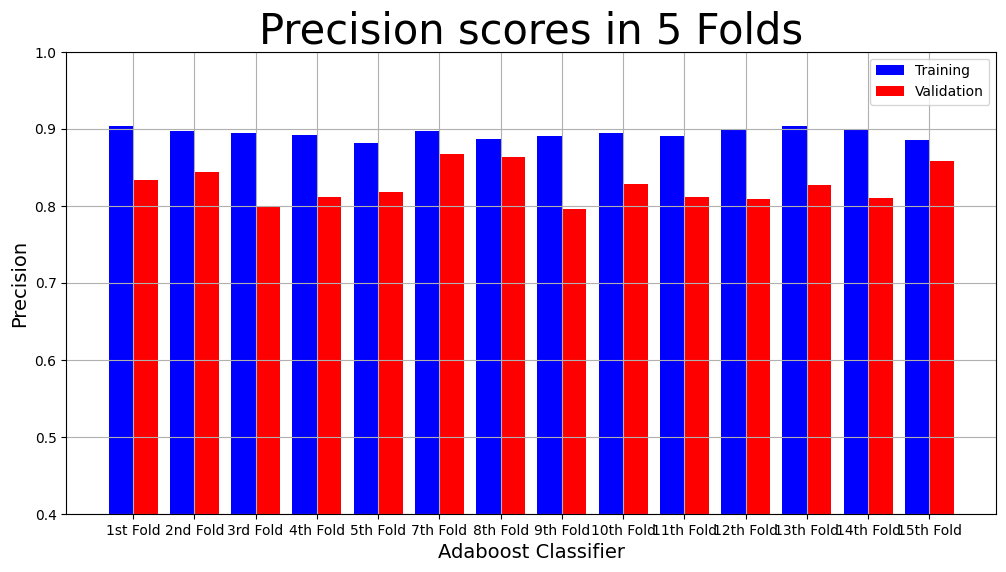

: 

In [ ]:
# Plot Precision Result
plot_result(model_name,
            "Precision",
            "Precision scores in 5 Folds",
            adaboost_result["Training Precision scores"],
            adaboost_result["Validation Precision scores"])


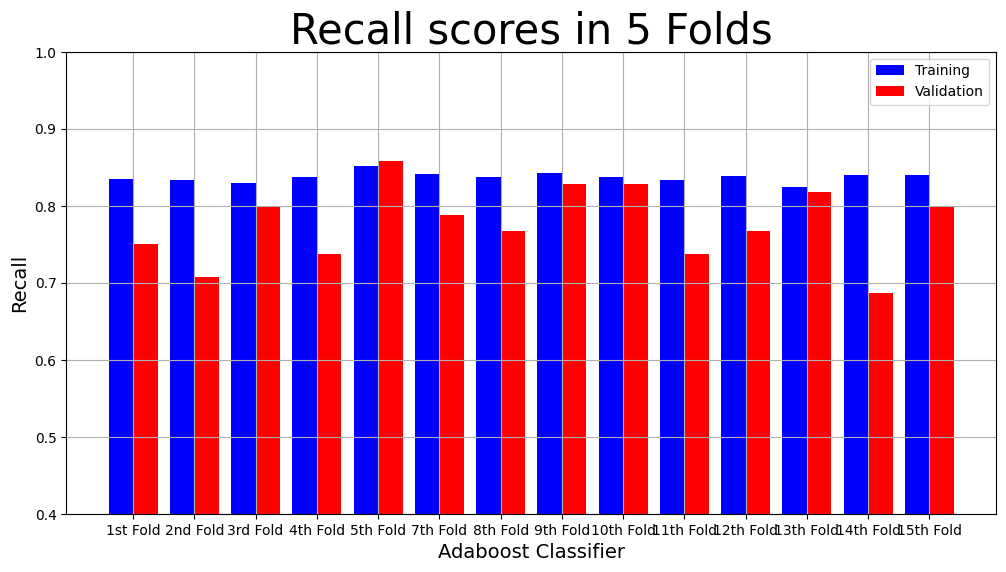

: 

In [ ]:
# Plot Recall Result
plot_result(model_name,
            "Recall",
            "Recall scores in 5 Folds",
            adaboost_result["Training Recall scores"],
            adaboost_result["Validation Recall scores"])

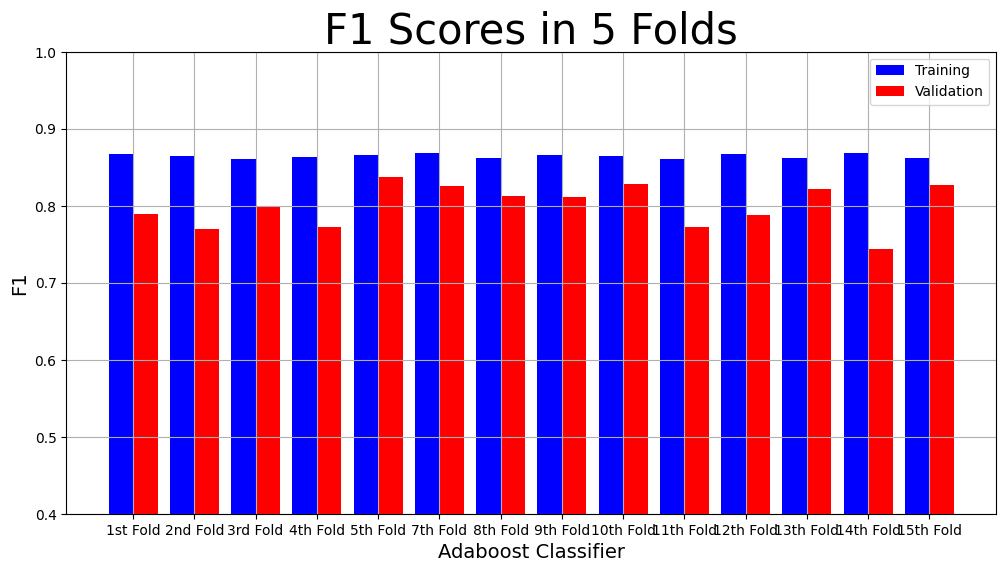

: 

In [ ]:
# Plot F1-Score Result
plot_result(model_name,
            "F1",
            "F1 Scores in 5 Folds",
            adaboost_result["Training F1 scores"],
            adaboost_result["Validation F1 scores"])


In [ ]:
for i in adaboost_result : 
    print(i)


Training Accuracy scores
Mean Training Accuracy
Training Precision scores
Mean Training Precision
Training Recall scores
Mean Training Recall
Training F1 scores
Mean Training F1 Score
Validation Accuracy scores
Mean Validation Accuracy
Validation Precision scores
Mean Validation Precision
Validation Recall scores
Mean Validation Recall
Validation F1 scores
Mean Validation F1 Score


: 

: 